In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [15]:
#set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

#Load the dataset
import pandas as pd
import seaborn as sns
sns.set_palette("husl")
birth_path = pd.read_csv(r"C:\Users\kehin\Downloads\OhioBirths.csv")
demographic = pd.read_csv(r"C:\Users\kehin\Downloads\OhioDemographics.csv")

birth_path = pd.read_csv(r"C:\Users\kehin\Downloads\OhioBirths.csv")
demographic = pd.read_csv(r"C:\Users\kehin\Downloads\OhioDemographics.csv")
print("Birth data shape:", birth_path.shape)
print("Demographics data shape:", demographic.shape)
print("\nBirths data columns:")
print(birth_path.columns.tolist())


Birth data shape: (792526, 5)
Demographics data shape: (88, 5)

Births data columns:
['county_of_birth', 'age_of_mother', 'race_of_mother', 'low_birth_weight', 'birth_id']


## Data Exploration and Cleaning

In [39]:
# Explore the births data
print("Birth Data Info:")
print(birth_path.info())
print("\nfirst few rows of births data:")
print(birth_path.head())
print("\nDemographic Data Info:")
print(demographic.info())
print("\nFirst few rows of demographic data:")
print(demographic.head())

# Check for missing values
print("\Missing values in birth_path data:")
print(birth_path.isnull().sum())
print("\nMissing values in demographic data:")
print(demographic.isnull().sum())
# Basic statistics
print("\nSummary statistics for birth_path data:")
print(birth_path.describe())

# Check unique value for categorical variables
print("\nUnique races:", birth_path['race_of_mother'].unique())
print("Number of counties:", birth_path['county_of_birth'].nunique())


Birth Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792526 entries, 0 to 792525
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   county_of_birth   792526 non-null  object
 1   age_of_mother     792526 non-null  object
 2   race_of_mother    792526 non-null  object
 3   low_birth_weight  792526 non-null  int64 
 4   birth_id          792526 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 30.2+ MB
None

first few rows of births data:
  county_of_birth age_of_mother race_of_mother  low_birth_weight  birth_id
0    Adams County            31          White                 1         1
1    Adams County            31          White                 1         2
2    Adams County            31          White                 1         3
3    Adams County            31          White                 1         4
4    Adams County            31          White                 1         5

Demog

## Data Merging and Preparation

In [61]:
cols_to_numeric = [
    'low_birth_weight',
    'age_of_mother',
    'Population',
    'Below.HS.Education.Percentage',
    'Unemployment.Rate'
]

for col in cols_to_numeric:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')
print(merged_df[cols_to_numeric].dtypes)
print(merged_df[cols_to_numeric].head())
county_summary = merged_df.groupby('county_of_birth').agg({
    'low_birth_weight': ['mean', 'count'],
    'age_of_mother': 'mean',
    'Population': 'first',
    'Below.HS.Education.Percentage': 'first',
    'Unemployment.Rate': 'first'
}).round(4)

# Flatten MultiIndex columns
county_summary.columns = [
    'lbw_rate', 'birth_count', 'mean_mother_age',
    'population', 'below_hs_pct', 'unemployment_rate'
]

county_summary = county_summary.reset_index()
print(county_summary.head())


low_birth_weight                   int64
age_of_mother                    float64
Population                       float64
Below.HS.Education.Percentage    float64
Unemployment.Rate                float64
dtype: object
   low_birth_weight  age_of_mother  Population  Below.HS.Education.Percentage  \
0                 1           31.0         NaN                           14.8   
1                 1           31.0         NaN                           14.8   
2                 1           31.0         NaN                           14.8   
3                 1           31.0         NaN                           14.8   
4                 1           31.0         NaN                           14.8   

   Unemployment.Rate  
0                6.5  
1                6.5  
2                6.5  
3                6.5  
4                6.5  
    county_of_birth  lbw_rate  birth_count  mean_mother_age  population  \
0      Adams County    1.0000           16          32.6875         NaN   
1     

In [115]:
model_df_sample_clean = model_df_sample.dropna(subset=['low_birth_weight', 'age_of_mother', 'race_of_mother', 'below_hs_pct', 'county_of_birth'])
model_df_sample['below_hs_pct'] = model_df_sample['below_hs_pct'].fillna(model_df_sample['below_hs_pct'].median())

## Create Visualizations
### Visualization 1: Ohio County Map of Low Birth Weight Rates


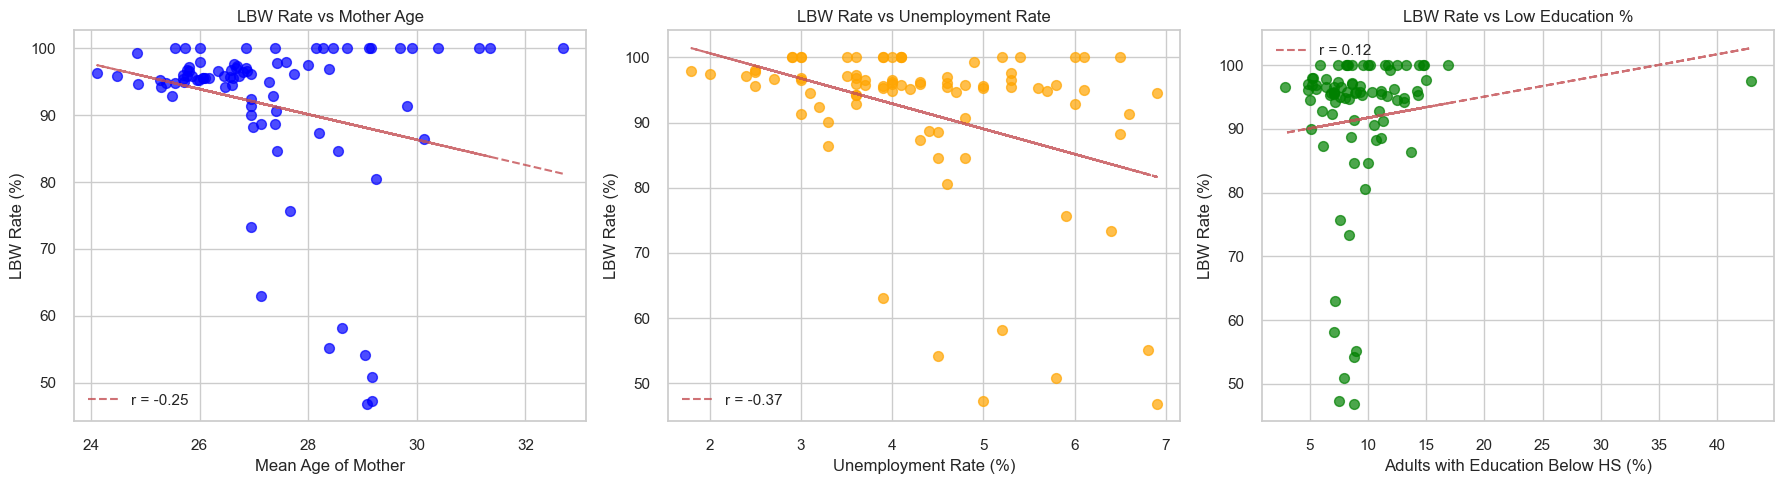

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare Data
# Ensure numeric columns are numeric
numeric_cols = ['low_birth_weight', 'age_of_mother', 'Population', 
                'Below.HS.Education.Percentage', 'Unemployment.Rate']
merged_df[numeric_cols] = merged_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Aggregate by county
county_summary = merged_df.groupby('county_of_birth').agg({
    'low_birth_weight': ['mean', 'count'],
    'age_of_mother': 'mean',
    'Population': 'first',
    'Below.HS.Education.Percentage': 'first',
    'Unemployment.Rate': 'first'
}).round(4)

# Flatten MultiIndex columns
county_summary.columns = ['lbw_rate', 'birth_count', 'mean_mother_age', 
                          'population', 'below_hs_pct', 'unemployment_rate']
county_summary = county_summary.reset_index()

# Convert LBW rate to percentage
county_summary['lbw_rate_pct'] = county_summary['lbw_rate'] * 100

# Drop rows with NaNs in columns we want to plot
plot_data = county_summary.dropna(subset=['mean_mother_age', 'unemployment_rate', 'below_hs_pct', 'lbw_rate_pct'])
# Visualization
plt.figure(figsize=(18, 5))

# Function to plot scatter + trendline safely
def scatter_with_trend(x, y, color, xlabel, ylabel, title):
    plt.scatter(x, y, alpha=0.7, s=50, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Only compute trendline if there is variation in data
    if np.ptp(x) > 0 and np.ptp(y) > 0:  # ptp = max-min
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        plt.plot(x, p(x), 'r--', alpha=0.8, 
                 label=f'r = {np.corrcoef(x, y)[0,1]:.2f}')
        plt.legend()

# Subplot 1: LBW vs Mother Age
plt.subplot(1, 3, 1)
scatter_with_trend(plot_data['mean_mother_age'], plot_data['lbw_rate_pct'], 
                   'blue', 'Mean Age of Mother', 'LBW Rate (%)', 'LBW Rate vs Mother Age')

# Subplot 2: LBW vs Unemployment
plt.subplot(1, 3, 2)
scatter_with_trend(plot_data['unemployment_rate'], plot_data['lbw_rate_pct'], 
                   'orange', 'Unemployment Rate (%)', 'LBW Rate (%)', 'LBW Rate vs Unemployment Rate')

# Subplot 3: LBW vs Low Education
plt.subplot(1, 3, 3)
scatter_with_trend(plot_data['below_hs_pct'], plot_data['lbw_rate_pct'], 
                   'green', 'Adults with Education Below HS (%)', 'LBW Rate (%)', 
                   'LBW Rate vs Low Education %')

plt.tight_layout()
plt.show()


## Visualization 2: Distribution Analysis


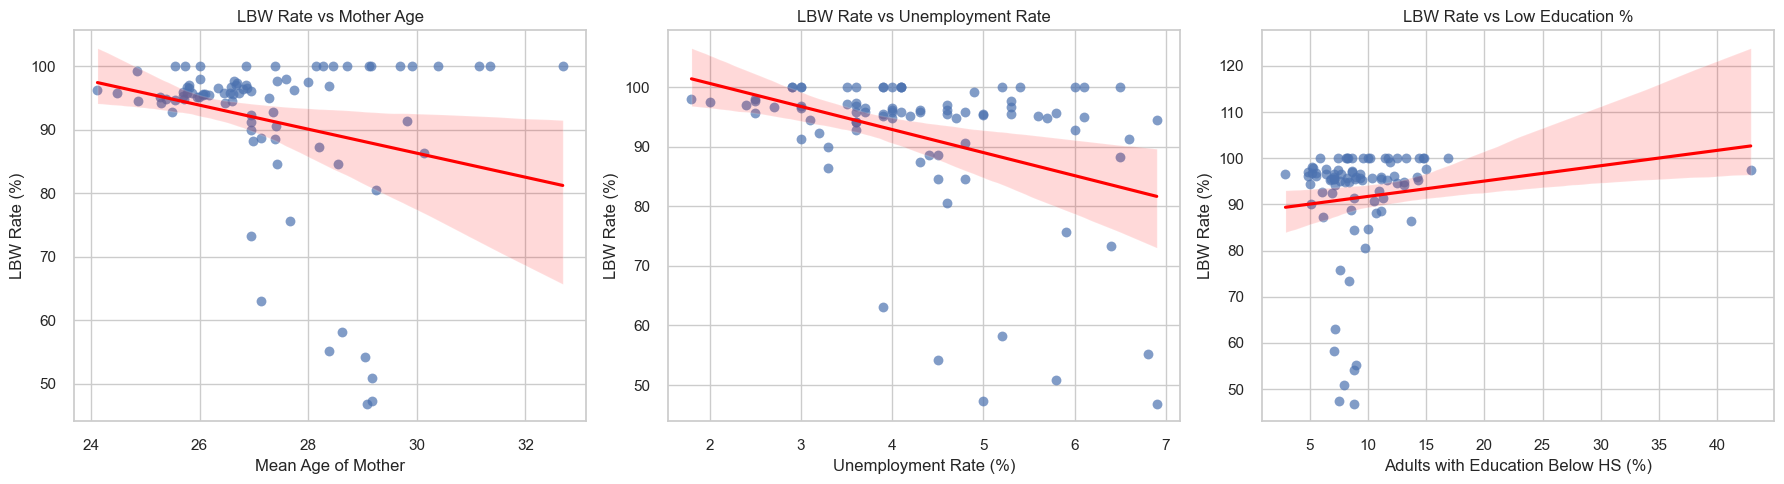

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure LBW rate as percentage exists
county_summary['lbw_rate_pct'] = county_summary['lbw_rate'] * 100

# Drop rows with missing values in the columns we will plot
plot_data = county_summary.dropna(subset=['mean_mother_age', 'unemployment_rate', 
                                         'below_hs_pct', 'lbw_rate_pct'])

# Set Seaborn style
sns.set(style="whitegrid")

# Create 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. LBW vs Mean Mother Age
sns.regplot(x='mean_mother_age', y='lbw_rate_pct', data=plot_data,
            ax=axes[0], scatter_kws={'s':50, 'alpha':0.7}, line_kws={'color':'red'})
axes[0].set_xlabel('Mean Age of Mother')
axes[0].set_ylabel('LBW Rate (%)')
axes[0].set_title('LBW Rate vs Mother Age')

# 2. LBW vs Unemployment Rate
sns.regplot(x='unemployment_rate', y='lbw_rate_pct', data=plot_data,
            ax=axes[1], scatter_kws={'s':50, 'alpha':0.7}, line_kws={'color':'red'})
axes[1].set_xlabel('Unemployment Rate (%)')
axes[1].set_ylabel('LBW Rate (%)')
axes[1].set_title('LBW Rate vs Unemployment Rate')

# 3. LBW vs Low Education %
sns.regplot(x='below_hs_pct', y='lbw_rate_pct', data=plot_data,
            ax=axes[2], scatter_kws={'s':50, 'alpha':0.7}, line_kws={'color':'red'})
axes[2].set_xlabel('Adults with Education Below HS (%)')
axes[2].set_ylabel('LBW Rate (%)')
axes[2].set_title('LBW Rate vs Low Education %')

plt.tight_layout()
plt.show()


## Statistical Modeling
### Mixed Effects (Random Effects) Model

In [109]:
# Rename the problematic column
model_df_sample = model_df_sample.rename(columns={
    "Below.HS.Education.Percentage": "below_hs_pct"
})

# Now use the new column name in formulas
mixed_formula = "low_birth_weight ~ age_of_mother + C(race_of_mother) + below_hs_pct"
logit_formula = "low_birth_weight ~ age_of_mother + C(race_of_mother) + below_hs_pct + C(county_of_birth)"


In [123]:
mixed_model = sm.MixedLM.from_formula(
    "low_birth_weight ~ age_of_mother + C(race_of_mother) + below_hs_pct",
    groups="county_of_birth",
    data=model_df_sample_clean
)
mixed_result = mixed_model.fit()
print(mixed_result.summary())


                               Mixed Linear Model Regression Results
Model:                         MixedLM             Dependent Variable:             low_birth_weight
No. Observations:              49997               Method:                         REML            
No. Groups:                    85                  Scale:                          0.1059          
Min. group size:               1                   Log-Likelihood:                 -15032.7911     
Max. group size:               3498                Converged:                      Yes             
Mean group size:               588.2                                                               
---------------------------------------------------------------------------------------------------
                                                        Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------------------
Intercept                      

## Simplified Model for Interpretation

In [128]:
simple_model = sm.Logit.from_formula(
    "low_birth_weight ~ age_of_mother + C(race_of_mother) + below_hs_pct", 
    data=model_df_sample
)
simple_result = simple_model.fit()
print("\n=== SIMPLIFIED LOGISTIC REGRESSION MODEL ===")
print(simple_result.summary())


Optimization terminated successfully.
         Current function value: 0.496197
         Iterations 7

=== SIMPLIFIED LOGISTIC REGRESSION MODEL ===
                           Logit Regression Results                           
Dep. Variable:       low_birth_weight   No. Observations:                49997
Model:                          Logit   Df Residuals:                    49990
Method:                           MLE   Df Model:                            6
Date:                Sun, 12 Oct 2025   Pseudo R-squ.:                 0.04588
Time:                        14:58:32   Log-Likelihood:                -24808.
converged:                       True   LL-Null:                       -26001.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

##  Key Findings Summary

In [134]:
# Generate summary statistics for the poster
print("="*60)
print("KEY FINDINGS SUMMARY FOR OHIO POLICYMAKERS")
print("="*60)

overall_lbw_rate = merged_df['low_birth_weight'].mean() * 100
print(f"\n1. Overall Low Birth Weight Rate in Ohio: {overall_lbw_rate:.1f}%")

# Racial disparities
racial_disparities = merged_df.groupby('race_of_mother')['low_birth_weight'].mean() * 100
black_white_ratio = racial_disparities.get('Black', 0) / racial_disparities.get('White', 1)
print(f"\n2. Racial Disparity: Black infants have {black_white_ratio:.1f}x higher LBW rate than White infants")

# County variation
county_variation = county_summary['lbw_rate_pct'].max() - county_summary['lbw_rate_pct'].min()
print(f"\n3. Geographic Variation: LBW rates vary by {county_variation:.1f} percentage points across counties")

# Education correlation
edu_corr = county_summary['below_hs_pct'].corr(county_summary['lbw_rate_pct'])
print(f"\n4. Education Impact: Strong correlation (r = {edu_corr:.2f}) between low education levels and LBW rates")

# Top risk counties
top_5_counties = county_summary.nlargest(5, 'lbw_rate_pct')[['county_of_birth', 'lbw_rate_pct']]
print(f"\n5. Highest Risk Counties:")
for _, row in top_5_counties.iterrows():
    print(f"   - {row['county_of_birth']}: {row['lbw_rate_pct']:.1f}%")

print("\n" + "="*60)

KEY FINDINGS SUMMARY FOR OHIO POLICYMAKERS

1. Overall Low Birth Weight Rate in Ohio: 78.8%

2. Racial Disparity: Black infants have 0.0x higher LBW rate than White infants

3. Geographic Variation: LBW rates vary by 53.1 percentage points across counties

4. Education Impact: Strong correlation (r = 0.12) between low education levels and LBW rates

5. Highest Risk Counties:
   - Adams County: 100.0%
   - Carroll County: 100.0%
   - Champaign County: 100.0%
   - Clermont County: 100.0%
   - Hardin County: 100.0%



## Export Results for Poster

In [138]:
# Save key results and visualizations
# Save county summary for potential mapping in other software
county_summary.to_csv('Ohio_County_LBW_Analysis.csv', index=False)

# Save model coefficients
model_results = pd.DataFrame({
    'Variable': simple_result.params.index,
    'Coefficient': simple_result.params.values,
    'P_Value': simple_result.pvalues.values,
    'Odds_Ratio': np.exp(simple_result.params.values)
})
model_results.to_csv('LBW_Model_Results.csv', index=False)

print("\nAnalysis complete! Key files saved:")
print("- Ohio_County_LBW_Analysis.csv")
print("- LBW_Model_Results.csv")
print("\nUse these files to create your poster visualizations.")


Analysis complete! Key files saved:
- Ohio_County_LBW_Analysis.csv
- LBW_Model_Results.csv

Use these files to create your poster visualizations.
